In [2]:
import numpy as np

def create_polygon4(n, m):
    # Calculate the vertices of the polygon
    angle = 2 * np.pi / n
    vertices = [(np.cos(i * angle), np.sin(i * angle)) for i in range(n)]
    vertices.append(vertices[0])  # add the first vertex to the end to close the polygon

    # Calculate the points along each edge
    edge_points = []
    for i in range(n):
        x1, y1 = vertices[i]
        x2, y2 = vertices[i+1]
        xs = np.linspace(x1, x2, m // n + 1)[:-1]
        ys = np.linspace(y1, y2, m // n + 1)[:-1]
        edge_points.extend(list(zip(xs, ys)))

    # Resample the points to get m total points
    resampled_points = []
    for i in range(len(edge_points) - 1):
        x1, y1 = edge_points[i]
        x2, y2 = edge_points[i + 1]
        xs = np.linspace(x1, x2, int(m / (n - 1)))
        ys = np.linspace(y1, y2, int(m / (n - 1)))
        resampled_points.extend(list(zip(xs, ys)))

    # If necessary, add more points to get to m total points
    while len(resampled_points) < m:
        # Choose a random point and add a new point halfway to a neighboring point
        i = np.random.randint(1, len(resampled_points) - 1)
        x1, y1 = resampled_points[i - 1]
        x2, y2 = resampled_points[i + 1]
        x_new = (x1 + x2) / 2
        y_new = (y1 + y2) / 2
        new_point = (x_new, y_new)

        # Check if the new point is unique
        while new_point in set(resampled_points):
            x_new = np.random.uniform(-1, 1)
            y_new = np.random.uniform(-1, 1)
            new_point = (x_new, y_new)

        resampled_points.insert(i, new_point)

    # Extract the x-coordinates and y-coordinates
    x_coords = [p[0] for p in resampled_points]
    y_coords = [p[1] for p in resampled_points]

    # Return the x-coordinates and y-coordinates
    return x_coords, y_coords


In [9]:
%matplotlib ipympl
# Some basic imports that are useful
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [1]:
import numpy as np

def polygon_points(n, m,i,j):
    # Calculate the angles between points
    angles = np.linspace(0, 2*np.pi, n+1)[:-1]
    # Calculate the x and y coordinates of the points
    x = np.cos(angles)
    y = np.sin(angles)
    # Interpolate additional points if necessary
    if m > n:
        t = np.linspace(0, 1, m-n)
        x = np.concatenate([x, np.interp(t, [0, 1], [x[i], x[j]])])
        y = np.concatenate([y, np.interp(t, [0, 1], [y[i], y[j]])])
    # Combine the x and y coordinates into a list of (x, y) tuples
#     points = [(x[i], y[i]) for i in range(m)]
    return x,y

In [2]:
x,y = polygon_points(3,9)

TypeError: polygon_points() missing 2 required positional arguments: 'i' and 'j'

In [20]:
import numpy as np

def polygon_points(n, m):
    # Calculate the angles between points
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    # Calculate the x and y coordinates of the points
    x = np.cos(angles)
    y = np.sin(angles)
    # Interpolate additional points if necessary
    if m > n:
        t = np.linspace(0, n, m-n, endpoint=False)
        x_interpolated = np.interp(t, np.arange(n), x)
        y_interpolated = np.interp(t, np.arange(n), y)
        # Remove any duplicated points
        mask = np.concatenate(([True], np.logical_or(np.diff(x_interpolated) != 0, np.diff(y_interpolated) != 0)))
        x_interpolated = x_interpolated[mask]
        y_interpolated = y_interpolated[mask]
        # Combine the original and interpolated x and y coordinates
        x = np.concatenate((x, x_interpolated))
        y = np.concatenate((y, y_interpolated))
    # Combine the x and y coordinates into a list of (x, y) tuples
#     points = [(x[i], y[i]) for i in range(len(x))]
    return x,y


Square: (10,)


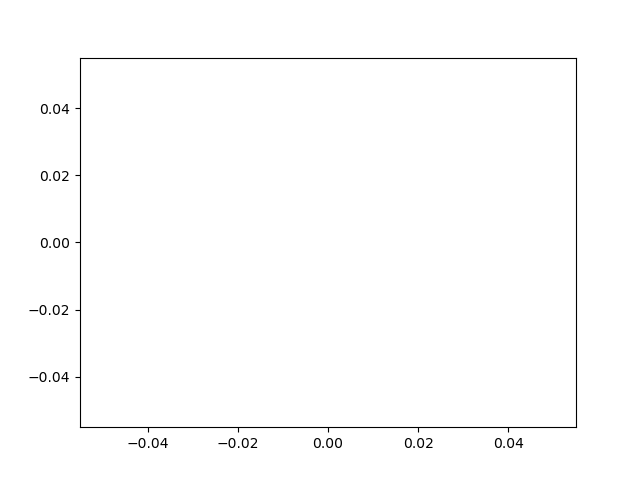

In [25]:
xc =[]
yc =[]
xs =[]
ys =[]


def morph(x1, y1, x2, y2, alpha): 
    xm = alpha * x1 + (1-alpha) * x2 
    ym = alpha * y1 + (1-alpha) * y2 
    return xm, ym

t = np.linspace(3*np.pi/4, -5*np.pi/4, 200) 
if len(t) % 4 != 0:
    raise BaseException("Number of points should be multiple of 4...") 

xc, yc = polygon_points5(3, 10)
xs, ys = polygon_points5(4, 10)
print(f"Square: {np.shape(xs)}")

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r')

def init(): 
    ax.set_xlim(-1.2, 1.2) 
    ax.set_ylim(-1.2, 1.2) 
    return ln

def update(frame):
    # xdata.append(frame)
    # ydata.append(np.sin(frame))
    xdata, ydata = morph(xs, ys, xc, yc, frame) 
    ln.set_data(xdata, ydata)
    return ln

ani = FuncAnimation(fig, update, frames=np.linspace(0, 1, 128), init_func=init, blit=True, interval=10, repeat=True)
plt.show()

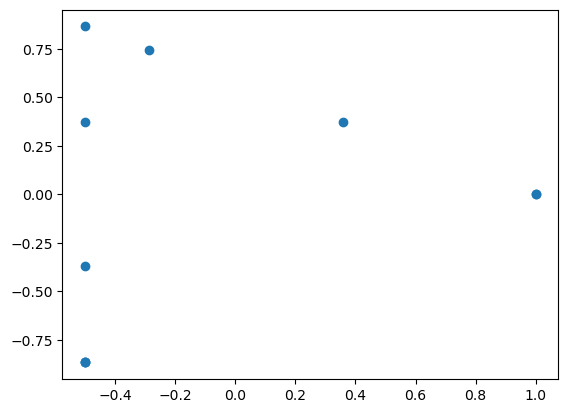

In [27]:
%matplotlib inline
plt.plot(xc,yc,'o')

In [19]:
xs,ys

(array([ 1.00000000e+00,  6.12323400e-17, -1.00000000e+00, -1.83697020e-16,
         1.00000000e+00,  3.33333333e-01, -3.33333333e-01, -1.00000000e+00,
        -3.33333333e-01, -1.83697020e-16]),
 array([ 0.00000000e+00,  1.00000000e+00,  1.22464680e-16, -1.00000000e+00,
         0.00000000e+00,  6.66666667e-01,  6.66666667e-01,  1.22464680e-16,
        -6.66666667e-01, -1.00000000e+00]))

In [36]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

def triangle_to_square():
    # Define the initial triangle and final square coordinates
    triangle_coords = np.array([[0, 0], [0.5, np.sqrt(3)/2], [1, 0]])
    square_coords = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

    # Define the interpolation function
    def interpolate_points(alpha):
        # Use linear interpolation to morph between the triangle and square coordinates
        return (1 - alpha) * triangle_coords + alpha * square_coords

    # Define the update function for the animation
    def update(alpha):
        # Clear the plot and plot the interpolated coordinates
        plt.clf()
        coords = interpolate_points(alpha)
        plt.plot(coords[:, 0], coords[:, 1], 'bo-')
        plt.axis('equal')

    # Create and save the animation
    ani = FuncAnimation(plt.gcf(), update, frames=np.linspace(0, 1, 128), init_func=init, blit=True, interval=10, repeat=True)
#     anim = FuncAnimation(plt.gcf(), update, frames=np.linspace(0, 1, 100), repeat=False)
    plt.show()
#     anim.save('triangle_to_square.gif', writer='imagemagick')





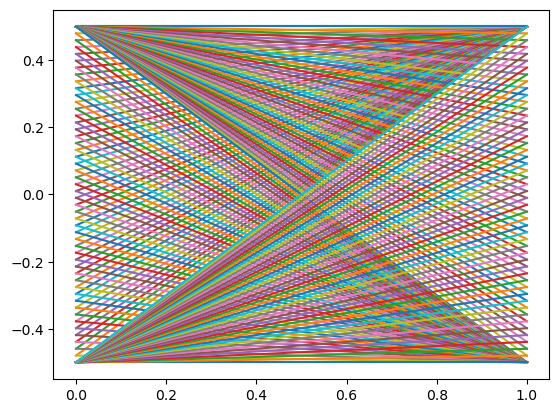

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def square(t):
    """Return x and y coordinates for a square in +/-0.5."""
    n4 = int(len(t) / 4)
    ts = np.linspace(-0.5, +0.5, n4)
    xs = np.concatenate([ts, 0.5*np.ones(n4), ts[::-1], -0.5*np.ones(n4)]) 
    ys = np.concatenate([xs[n4:], xs[:n4]])
    return xs, ys

t = np.linspace(3*np.pi/4, -5*np.pi/4, 200)

plt.plot(square(t),)

In [6]:
def poly(t):
    n4 = int(len(t) / 4)
    ts = np.linspace(-0.5, +0.5, n4)
    xs = np.concatenate([ts, 0.5*np.ones(n4), ts[::], -0.5*np.ones(n4)]) 
    ys = np.concatenate([xs[n4:], xs[:n4]])
    return xs, ys

In [10]:
xs,ys = poly(t)
xs

array([-0.5       , -0.47959184, -0.45918367, -0.43877551, -0.41836735,
       -0.39795918, -0.37755102, -0.35714286, -0.33673469, -0.31632653,
       -0.29591837, -0.2755102 , -0.25510204, -0.23469388, -0.21428571,
       -0.19387755, -0.17346939, -0.15306122, -0.13265306, -0.1122449 ,
       -0.09183673, -0.07142857, -0.05102041, -0.03061224, -0.01020408,
        0.01020408,  0.03061224,  0.05102041,  0.07142857,  0.09183673,
        0.1122449 ,  0.13265306,  0.15306122,  0.17346939,  0.19387755,
        0.21428571,  0.23469388,  0.25510204,  0.2755102 ,  0.29591837,
        0.31632653,  0.33673469,  0.35714286,  0.37755102,  0.39795918,
        0.41836735,  0.43877551,  0.45918367,  0.47959184,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5 

In [40]:
import numpy as np

def morph_triangle_to_polygon(n, t):
    """Return x and y coordinates for a morphing triangle to a regular polygon with n sides."""
    # Define the vertices of the triangle
    tri_xs = np.array([-0.5, 0.5, 0])
    tri_ys = np.array([-0.5, -0.5, 0.5*np.sqrt(3)])

    # Define the vertices of the regular polygon
    poly_angles = np.linspace(0, 2*np.pi, n+1)[:-1]
    poly_xs = 0.5*np.cos(poly_angles)
    poly_ys = 0.5*np.sin(poly_angles)

    # Interpolate between the triangle and the polygon
    xs = (1-t)*tri_xs[:3] + t*poly_xs[:3]
    ys = (1-t)*tri_ys[:3] + t*poly_ys[:3]

    return xs, ys


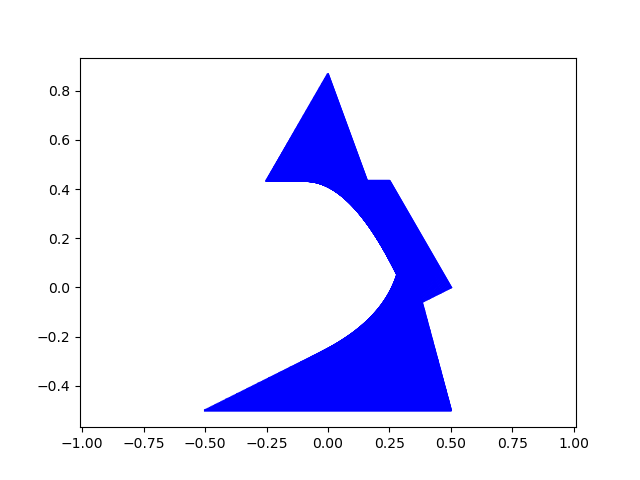

In [41]:
import matplotlib.pyplot as plt

n = 6 # Number of sides in the polygon (hexagon)
t_values = np.linspace(0, 1, 200) # 21 equally spaced values of t from 0 to 1
for t in t_values:
    xs, ys = morph_triangle_to_polygon(n, t)
    plt.plot(xs, ys, 'b-')
plt.axis('equal')
plt.show()


In [34]:
%matplotlib ipympl
xc =[]
yc =[]
xs =[]
ys =[]


def morph(x1, y1, x2, y2, alpha): 
    xm = alpha * x1 + (1-alpha) * x2 
    ym = alpha * y1 + (1-alpha) * y2 
    return xm, ym

t = np.linspace(0, 1, 200) 
if len(t) % 4 != 0:
    raise BaseException("Number of points should be multiple of 4...") 

xc1, yc1 = morph_triangle_to_polygon(3, t)
xs1, ys1 = morph_triangle_to_polygon(4, t)
# print(f"Square: {np.shape(xs)}")

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r')

def init(): 
    ax.set_xlim(-1.2, 1.2) 
    ax.set_ylim(-1.2, 1.2) 
    return ln

def update(frame):
    # xdata.append(frame)
    # ydata.append(np.sin(frame))
    xdata, ydata = morph(xs1, ys1, xc1, yc1, frame) 
    ln.set_data(xdata, ydata)
    return ln

ani = FuncAnimation(fig, update, frames=np.linspace(0, 1, 128), init_func=init, blit=True, interval=10, repeat=True)
plt.show()

ValueError: operands could not be broadcast together with shapes (200,) (3,) 